In [1]:
!git --version

git version 2.43.0


In [2]:
!git init

Reinitialized existing Git repository in /home/ejfisher/projects/py4sci_project/.git/


In [41]:
# Remove the invalid remote
!git remote remove origin

# Add the correct remote URL
!git remote add origin https://github.com/evanfishfish/py4sci_project.git


# What is SMIPoly?

SMiPoly (Small Molecules into Polymers) is a Python-based, rule-driven virtual library generator.

### Now what does this mean?
SMIPoly utilizes 22 main 'rules' of polymerization to determine potential structures of polymers based on input criteria.

### Polymerization rules
| #  | Polymer Class       | Monomer Class 1      | Monomer Class 2         | Reaction Type         | Description/Example Functional Groups                   |
|----|---------------------|----------------------|-------------------------|----------------------|---------------------------------------------------------|
| 1  | Polyolefin          | Vinyl                | -                       | Addition             | Polymerization of simple olefins (e.g., ethylene)       |
| 2  | Polyolefin          | Cyclic olefin        | -                       | Addition             | Polymerization of cyclic olefins                        |
| 3  | Polyolefin          | Vinyl                | Vinyl                   | Addition             | Copolymerization of two vinyl monomers                  |
| 4  | Polyolefin          | Vinyl                | Cyclic olefin           | Addition             | Copolymerization of vinyl and cyclic olefin             |
| 5  | Polyolefin          | Cyclic olefin        | Cyclic olefin           | Addition             | Copolymerization of two cyclic olefins                  |
| 6  | Polyolefin          | Vinyl                | -                       | Ring-opening         | Ring-opening polymerization of vinyl monomers           |
| 7  | Polyolefin          | Cyclic olefin        | -                       | Ring-opening         | Ring-opening polymerization of cyclic olefins           |
| 8  | Polyester           | Diol                 | Diacid (or equivalent)  | Polycondensation     | Esterification (e.g., diol + diacid)                    |
| 9  | Polyester           | Hydroxy acid         | -                       | Polycondensation     | Self-condensation of hydroxy acid                       |
| 10 | Polyester           | Diol                 | Phosgene (or equivalent)| Polycondensation     | Diol + phosgene (polycarbonate synthesis)               |
| 11 | Polyester           | Diol                 | Diester                 | Polycondensation     | Diol + diester                                          |
| 12 | Polyether           | Diol                 | -                       | Polycondensation     | Self-condensation of diol                               |
| 13 | Polyamide           | Diamine              | Diacid (or equivalent)  | Polycondensation     | Diamine + diacid (amide formation)                      |
| 14 | Polyamide           | Amino acid           | -                       | Polycondensation     | Self-condensation of amino acid                         |
| 15 | Polyamide           | Diamine              | Diester                 | Polycondensation     | Diamine + diester                                       |
| 16 | Polyimide           | Dianhydride          | Diamine                 | Polycondensation     | Dianhydride + diamine                                   |
| 17 | Polyurethane        | Diol                 | Diisocyanate            | Polyaddition         | Diol + diisocyanate                                     |
| 18 | Polyurethane        | Diamine              | Diisocyanate            | Polyaddition         | Diamine + diisocyanate                                  |
| 19 | Polyoxazolidone     | Di/polyepoxide       | Di/polyisocyanate       | Polyaddition         | Epoxide + isocyanate                                    |
| 20 | Polyether           | Epoxide              | -                       | Ring-opening         | Ring-opening polymerization of epoxides                 |
| 21 | Polyethersulfone    | Bisphenol            | Dichlorodiphenyl sulfone| Polycondensation     | Bisphenol + dichlorodiphenyl sulfone                   |
| 22 | Polyetherketone     | Bisphenol            | Dichlorobenzophenone    | Polycondensation     | Bisphenol + dichlorobenzophenone                       |


## SMIPoly has two main functions: monc and polg.

#### monc.py 
Classifies monomers based on their functional groups.

In [4]:
import pandas as pd
DF = pd.read_csv("https://raw.githubusercontent.com/evanfishfish/py4sci_project/refs/heads/main/202207_smip_monset.csv")
DF

,comID,MolecularFormula,MolecularWeight,SMILES,IUPACName
0,CID174,C2H6O2,62.07,C(CO)O,"ethane-1,2-diol"
1,CID196,C6H10O4,146.14,C(CCC(=O)O)CC(=O)O,hexanedioic acid
2,CID262,C4H10O2,90.12,CC(C(C)O)O,"butane-2,3-diol"
3,CID273,C5H14N2,102.18,C(CCN)CCN,"pentane-1,5-diamine"
4,CID371,C4H2O4,114.06,C(#CC(=O)O)C(=O)O,but-2-ynedioic acid
...,...,...,...,...,...
1078,CID91972128,C22H10N4,330.30,C=CC1=CC2=C(C=C1)C(=C(C#N)C#N)C3=CC=CC=C3C2=C(...,2-[10-(dicyanomethylidene)-3-ethenylanthracen-...
1079,CID102529357,C14H30O5Si,306.47,CO[Si](CCCCCCCCOCC1CO1)(OC)OC,trimethoxy-[8-(oxiran-2-ylmethoxy)octyl]silane
1080,CID125370311,C15H24O2Si,264.43,C=CC[Si](CCCOC(=O)C=C)(CC=C)CC=C,3-tris(prop-2-enyl)silylpropyl prop-2-enoate
1081,CID125401955,C16H26O2Si,278.46,CC(=C)C(=O)OCCC[Si](CC=C)(CC=C)CC=C,3-tris(prop-2-enyl)silylpropyl 2-methylprop-2-...


| Classification | Description                                                                                 | Examples / Notes                              |
|----------------|---------------------------------------------------------------------------------------------|-----------------------------------------------|
| **Vinyl**      | Contains C=C double bonds for addition (chain) polymerization                              | Ethylene, Styrene                             |
| **Epo**        | Epoxide groups (three-membered cyclic ethers)                                             | Epichlorohydrin                              |
| **cOle**       | Cyclic olefins with ring-strained double bonds                                            | Norbornene                                   |
| **Lactone**    | Cyclic esters suitable for ring-opening polymerization                                    | ε-Caprolactone                               |
| **Lactam**     | Cyclic amides used in ring-opening polymerization                                         | Caprolactam                                  |
| **hydCOOH**    | Hydroxy carboxylic acids (monomers with both -OH and -COOH groups)                        | 6-Hydroxyhexanoic acid                       |
| **aminCOOH**   | Amino acids (monomers with both -NH₂ and -COOH groups)                                   | Glycine, Alanine                             |
| **hindPhenol** | Sterically hindered phenols, often bisphenol analogs                                     | Bisphenol A                                  |
| **cAnhyd**     | Cyclic carboxylic acid anhydrides                                                        | Phthalic anhydride                           |
| **CO**         | Carbon monoxide (used in coordination polymerization or carbonyl-containing monomers)     | Context-specific                             |
| **HCHO**       | Formaldehyde (used in phenolic/formaldehyde resins)                                      | Phenol-formaldehyde resins                    |
| **sfonediX**   | Bis(p-halogenated aryl) sulfones (X = halogen)                                           | Bis(4-fluorophenyl) sulfone                   |
| **BzodiF**     | Bis(p-fluoroaryl) ketones                                                                | Aromatic ketones with fluorine substituents  |
| **diepo**      | Di- or poly-epoxides                                                                     | Diglycidyl ether of bisphenol A (DGEBA)      |
| **diCOOH**     | Di- or poly-carboxylic acids                                                             | Terephthalic acid                            |
| **diol**       | Di- or poly-hydroxyl compounds (polyols)                                                 | Ethylene glycol, Glycerol                     |
| **diamin**     | Di- or poly-amines                                                                       | Hexamethylenediamine                         |
| **diNCO**      | Di- or poly-isocyanates                                                                  | Toluene diisocyanate (TDI)                    |
| **dicAnhyd**   | Di- or poly-cyclic carboxylic acid anhydrides                                           | Pyromellitic dianhydride                      |
| **pridiamin**  | Primary di- or poly-amines (specific subclass of diamin)                                | Primary diamines                              |
| **diol_b**     | Di- or poly-hydroxyl compounds excluding thiols                                         | Typical polyols without sulfur                |


In [5]:
from smipoly.smip import monc

DF_class = monc.moncls(df=DF, smiColn='SMILES', dsp_rsl=True)

1
vinyl  =  462  /  1085
2
epo  =  71  /  1085
3
cOle  =  52  /  1085
4
lactone  =  13  /  1085
5
lactam  =  1  /  1085
6
hydCOOH  =  7  /  1085
7
aminCOOH  =  1  /  1085
8
hindPhenol  =  8  /  1085
9
cAnhyd  =  33  /  1085
10
CO  =  1  /  1085
11
HCHO  =  1  /  1085
12
sfonediX  =  4  /  1085
13
BzodiF  =  1  /  1085
51
diepo  =  14  /  1085
52
diCOOH  =  85  /  1085
53
diol  =  162  /  1085
54
diamin  =  150  /  1085
55
diNCO  =  19  /  1085
56
dicAnhyd  =  28  /  1085
57
pridiamin  =  143  /  1085
58
diol_b  =  132  /  1085


In [6]:
DF_class

,comID,MolecularFormula,MolecularWeight,SMILES,IUPACName,smip_cand_mons,vinyl,epo,cOle,lactone,...,sfonediX,BzodiF,diepo,diCOOH,diol,diamin,diNCO,dicAnhyd,pridiamin,diol_b
0,CID174,C2H6O2,62.07,C(CO)O,"ethane-1,2-diol",OCCO,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,CID196,C6H10O4,146.14,C(CCC(=O)O)CC(=O)O,hexanedioic acid,O=C(O)CCCCC(=O)O,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,CID262,C4H10O2,90.12,CC(C(C)O)O,"butane-2,3-diol",CC(O)C(C)O,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,CID273,C5H14N2,102.18,C(CCN)CCN,"pentane-1,5-diamine",NCCCCCN,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,CID371,C4H2O4,114.06,C(#CC(=O)O)C(=O)O,but-2-ynedioic acid,O=C(O)C#CC(=O)O,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,CID125370311,C15H24O2Si,264.43,C=CC[Si](CCCOC(=O)C=C)(CC=C)CC=C,3-tris(prop-2-enyl)silylpropyl prop-2-enoate,C=CC[Si](CC=C)(CC=C)CCCOC(=O)C=C,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1081,CID125401955,C16H26O2Si,278.46,CC(=C)C(=O)OCCC[Si](CC=C)(CC=C)CC=C,3-tris(prop-2-enyl)silylpropyl 2-methylprop-2-...,C=CC[Si](CC=C)(CC=C)CCCOC(=O)C(=C)C,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1082,CID138112368,C14H24F6N2O6S2+,494.50,CCCC[N+](C)(C)CCOC(=O)C(=C)C.C(F)(F)(F)S(=O)(=...,butyl-dimethyl-[2-(2-methylprop-2-enoyloxy)eth...,C=C(C)C(=O)OCC[N+](C)(C)CCCC.O=S(=O)([N]S(=O)(...,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1083,NaN,NaN,NaN,[C-]#[O+],NaN,[C-]#[O+],False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
DF_class.to_csv('DF_class.csv', index=False)

!git add DF_class.csv Project_actual.ipynb  # Explicitly add needed files



In [45]:
%%writefile .gitignore
.ipynb_checkpoints/
*.ipynb

Writing .gitignore


In [46]:
!git add .gitignore
!git commit -m "Add .gitignore"

[main 6cc42e2] Add .gitignore
 1 file changed, 2 insertions(+)
 create mode 100644 .gitignore


In [47]:
!git commit -m "Classification"
!git push -u origin main

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Project_actual.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
To https://github.com/evanfishfish/py4sci_project.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/evanfishfish/py4sci_project.git'
hint: Updates were rejected because the remote contains work that you do not
hint: have locally. This is usually caused by another repository pushing to
hint: the same ref. If you want to integrate the remote changes, use
hint: 'git pull' before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [8]:
DF_class_indexed = DF_class.set_index ('SMILES')
DF_class_indexed

,comID,MolecularFormula,MolecularWeight,IUPACName,smip_cand_mons,vinyl,epo,cOle,lactone,lactam,...,sfonediX,BzodiF,diepo,diCOOH,diol,diamin,diNCO,dicAnhyd,pridiamin,diol_b
SMILES,,,,,,,,,,,,,,,,,,,,,
C(CO)O,CID174,C2H6O2,62.07,"ethane-1,2-diol",OCCO,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
C(CCC(=O)O)CC(=O)O,CID196,C6H10O4,146.14,hexanedioic acid,O=C(O)CCCCC(=O)O,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
CC(C(C)O)O,CID262,C4H10O2,90.12,"butane-2,3-diol",CC(O)C(C)O,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
C(CCN)CCN,CID273,C5H14N2,102.18,"pentane-1,5-diamine",NCCCCCN,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
C(#CC(=O)O)C(=O)O,CID371,C4H2O4,114.06,but-2-ynedioic acid,O=C(O)C#CC(=O)O,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C=CC[Si](CCCOC(=O)C=C)(CC=C)CC=C,CID125370311,C15H24O2Si,264.43,3-tris(prop-2-enyl)silylpropyl prop-2-enoate,C=CC[Si](CC=C)(CC=C)CCCOC(=O)C=C,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CC(=C)C(=O)OCCC[Si](CC=C)(CC=C)CC=C,CID125401955,C16H26O2Si,278.46,3-tris(prop-2-enyl)silylpropyl 2-methylprop-2-...,C=CC[Si](CC=C)(CC=C)CCCOC(=O)C(=C)C,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CCCC[N+](C)(C)CCOC(=O)C(=C)C.C(F)(F)(F)S(=O)(=O)[N]S(=O)(=O)C(F)(F)F,CID138112368,C14H24F6N2O6S2+,494.50,butyl-dimethyl-[2-(2-methylprop-2-enoyloxy)eth...,C=C(C)C(=O)OCC[N+](C)(C)CCCC.O=S(=O)([N]S(=O)(...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
DF_class_indexed_bool = DF_class_indexed.replace({'True': True, 'False': False})
DF_class_indexed_bool

,comID,MolecularFormula,MolecularWeight,IUPACName,smip_cand_mons,vinyl,epo,cOle,lactone,lactam,...,sfonediX,BzodiF,diepo,diCOOH,diol,diamin,diNCO,dicAnhyd,pridiamin,diol_b
SMILES,,,,,,,,,,,,,,,,,,,,,
C(CO)O,CID174,C2H6O2,62.07,"ethane-1,2-diol",OCCO,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
C(CCC(=O)O)CC(=O)O,CID196,C6H10O4,146.14,hexanedioic acid,O=C(O)CCCCC(=O)O,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
CC(C(C)O)O,CID262,C4H10O2,90.12,"butane-2,3-diol",CC(O)C(C)O,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
C(CCN)CCN,CID273,C5H14N2,102.18,"pentane-1,5-diamine",NCCCCCN,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
C(#CC(=O)O)C(=O)O,CID371,C4H2O4,114.06,but-2-ynedioic acid,O=C(O)C#CC(=O)O,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C=CC[Si](CCCOC(=O)C=C)(CC=C)CC=C,CID125370311,C15H24O2Si,264.43,3-tris(prop-2-enyl)silylpropyl prop-2-enoate,C=CC[Si](CC=C)(CC=C)CCCOC(=O)C=C,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CC(=C)C(=O)OCCC[Si](CC=C)(CC=C)CC=C,CID125401955,C16H26O2Si,278.46,3-tris(prop-2-enyl)silylpropyl 2-methylprop-2-...,C=CC[Si](CC=C)(CC=C)CCCOC(=O)C(=C)C,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CCCC[N+](C)(C)CCOC(=O)C(=C)C.C(F)(F)(F)S(=O)(=O)[N]S(=O)(=O)C(F)(F)F,CID138112368,C14H24F6N2O6S2+,494.50,butyl-dimethyl-[2-(2-methylprop-2-enoyloxy)eth...,C=C(C)C(=O)OCC[N+](C)(C)CCCC.O=S(=O)([N]S(=O)(...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
smiles_input = input(f"Enter the SMILES string").strip()

if smiles_input in DF_class_indexed_bool.index:
    row = DF_class_indexed_bool.loc[smiles_input]
    # Use == True instead of is True
    true_columns = [col for col in DF_class_indexed.columns if row[col] == True]
    if true_columns:
        print(f"Columns with True value for SMILES '{smiles_input}': {true_columns}")
    else:
        print(f"No columns have True value for SMILES '{smiles_input}'.")
else:
    print(f"SMILES '{smiles_input}' not found in the DataFrame index.")


Enter the SMILES string O=C(O)C#CC(=O)O


SMILES 'O=C(O)C#CC(=O)O' not found in the DataFrame index.


#### Polg
Generates polymer repeating units by applying functional group transformations,

In [11]:
from smipoly.smip import monc, polg
import pandas as pd
import numpy as np
import time

In [12]:
from smipoly.smip import monc, polg
import pandas as pd

DF = pd.read_csv("202207_smip_monset.csv")

def polymerize_two_monomers():
    monomer1 = input("Enter first monomer SMILES: ").strip()
    monomer2 = input("Enter second monomer SMILES: ").strip()
    
    df = pd.DataFrame({
        'SMILES': [monomer1, monomer2],
        'Name': ['Monomer1', 'Monomer2']
    })
    
    classified_df = monc.moncls(df, smiColn='SMILES', dsp_rsl=False)
    
    polymers = polg.biplym(classified_df, targ=['all'], Pmode='a', dsp_rsl=False)
    
    if not polymers.empty:
        print("\nPossible polymers:")
        for idx, row in polymers.iterrows():
            print(f"Polymer {idx+1}: {row['polym']} (Type: {row['polymer_class']})")
    else:
        print("No compatible polymers found.")

if __name__ == "__main__":
    polymerize_two_monomers()

Enter first monomer SMILES:  O=C(O)C#CC(=O)O
Enter second monomer SMILES:  C=CC[Si](CC=C)(CC=C)CCCOC(=O)C(=C)C	



Possible polymers:
Polymer 1: *CC(*)C[Si](CCCOC(=O)C(*)(C)C*)(CC(*)C*)CC(*)C* (Type: polyolefin)


Enter first monomer SMILES:  O=C(O)C#CC(=O)O
Enter second monomer SMILES:  C=CC[Si](CC=C)(CC=C)CCCOC(=O)C(=C)C



Generated 1 polymers:

Polymer 1:
SMILES: *CC(*)C[Si](CCCOC(=O)C(*)(C)C*)(CC(*)C*)CC(*)C*
Type: polyolefin


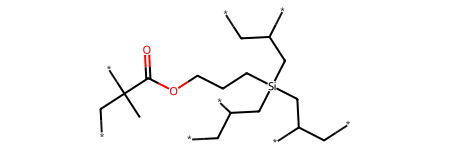

────────────────────────────────────────


In [13]:
from smipoly.smip import monc, polg
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display  # For Jupyter Notebook rendering

def polymerize_and_display():
    # Get user input
    m1 = input("Enter first monomer SMILES: ").strip()
    m2 = input("Enter second monomer SMILES: ").strip()
    
    # Create temporary monomer DataFrame
    monomer_df = pd.DataFrame({
        'SMILES': [m1, m2],
        'Name': ['Monomer1', 'Monomer2']
    })
    
    # Classify monomers and generate polymers
    classified = monc.moncls(monomer_df, smiColn='SMILES', dsp_rsl=False)
    polymers = polg.biplym(classified, targ=['all'], Pmode='a', dsp_rsl=False)
    
    if not polymers.empty:
        print(f"\nGenerated {len(polymers)} polymers:")
        for idx, row in polymers.iterrows():
            # Extract polymer details
            smi = row['polym']          # SMILES string
            ptype = row['polymer_class']  # Polymer type
            mol = Chem.MolFromSmiles(smi)
            
            # Print text info
            print(f"\nPolymer {idx+1}:")
            print(f"SMILES: {smi}")
            print(f"Type: {ptype}")
            
            # Display structure if valid
            if mol:
                display(mol)  # Renders molecule in Jupyter Notebook
                # For non-Jupyter environments, use:
                # Draw.MolToImage(mol, size=(300,300)).show()
            else:
                print("Invalid SMILES - cannot display structure")
            print("─" * 40)
    else:
        print("No polymers generated")

if __name__ == "__main__":
    polymerize_and_display()


## SKIP NEXT CELL

In [ ]:
tpstart = time.perf_counter()
DF_run2 = polg.biplym(df=DF_class_indexed_bool, targ=['polyolefin', ], Pmode='a', dsp_rsl=True)
tpend = time.perf_counter()
tm = tpend-tpstart
print("CPU time: ", tm)
print(f"DF_run2 memory usage: {DF_run2.memory_usage(deep=True).sum() / 1024 ** 2} MB")

In [14]:
tpstart = time.perf_counter()
DF_run1 = polg.biplym(df=DF_class_indexed_bool, targ=['polyether', ], Pmode='a', dsp_rsl=True)
tpend = time.perf_counter()
tm = tpend-tpstart
print("CPU time: ", tm)
print(f"DF_run1 memory usage: {DF_run1.memory_usage(deep=True).sum() / 1024 ** 2} MB")

run at advanced mode
number of polymerization reactions =  739
number of generated polymers =  868
CPU time:  22.756080120000206
DF_run1 memory usage: 0.34790992736816406 MB


In [15]:
DF_run1

,mon1,mon2,polym,polymer_class,Ps_rxnL,reactset
0,CC(C)(c1ccc(OCC2CO2)cc1)c1ccc(OCC2CO2)cc1,,*CC(COc1ccc(C(C)(C)c2ccc(OCC(*)CO*)cc2)cc1)O*,polyether,2,"(, CC(C)(c1ccc(OCC2CO2)cc1)c1ccc(OCC2CO2)cc1)"
1,CC(C)(c1ccc(OCC2CO2)cc1)c1ccc(OCC2CO2)cc1,,*CC(COc1ccc(C(C)(C)c2ccc(OCC(C*)O*)cc2)cc1)O*,polyether,2,"(, CC(C)(c1ccc(OCC2CO2)cc1)c1ccc(OCC2CO2)cc1)"
2,C1CO1,,*CCO*,polyether,2,"(, C1CO1)"
3,CC1CO1,,*OCC(*)C,polyether,2,"(, CC1CO1)"
4,CC1CO1,,*CC(C)O*,polyether,2,"(, CC1CO1)"
...,...,...,...,...,...,...
863,O=C(c1ccc(F)cc1)c1ccc(F)cc1,Oc1ccc(-c2ccc(O)c(Br)c2)cc1Br,*Oc1ccc(-c2ccc(Oc3ccc(C(=O)c4ccc(*)cc4)cc3)c(B...,polyether,115,"(O=C(c1ccc(F)cc1)c1ccc(F)cc1, Oc1ccc(-c2ccc(O)..."
864,O=C(c1ccc(F)cc1)c1ccc(F)cc1,Oc1ccc(C2(c3ccc(O)c(C4CCCCC4)c3)CCCCC2)cc1C1CC...,*Oc1ccc(C2(c3ccc(Oc4ccc(C(=O)c5ccc(*)cc5)cc4)c...,polyether,115,(Oc1ccc(C2(c3ccc(O)c(C4CCCCC4)c3)CCCCC2)cc1C1C...
865,O=C(c1ccc(F)cc1)c1ccc(F)cc1,Oc1ccc(C2(c3ccc(O)c(O)c3)c3ccccc3-c3ccccc32)cc1O,*Oc1ccc(C2(c3ccc(Oc4ccc(C(=O)c5ccc(*)cc5)cc4)c...,polyether,115,(Oc1ccc(C2(c3ccc(O)c(O)c3)c3ccccc3-c3ccccc32)c...
866,O=C(c1ccc(F)cc1)c1ccc(F)cc1,Oc1ccc(C2(c3ccc(O)c(O)c3)c3ccccc3-c3ccccc32)cc1O,*Oc1ccc(C2(c3ccc(O*)c(Oc4ccc(C(=O)c5ccc(*)cc5)...,polyether,115,(Oc1ccc(C2(c3ccc(O)c(O)c3)c3ccccc3-c3ccccc32)c...


In [16]:
DF_run1.to_csv('DF_run1.csv', columns=['mon1', 'mon2', 'polym', 'polymer_class'], index=False)

/home/ejfisher/miniconda3/envs/evan_env/lib/python3.12/site-packages/rdkit/Chem/Draw/IPythonConsole.py:343: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


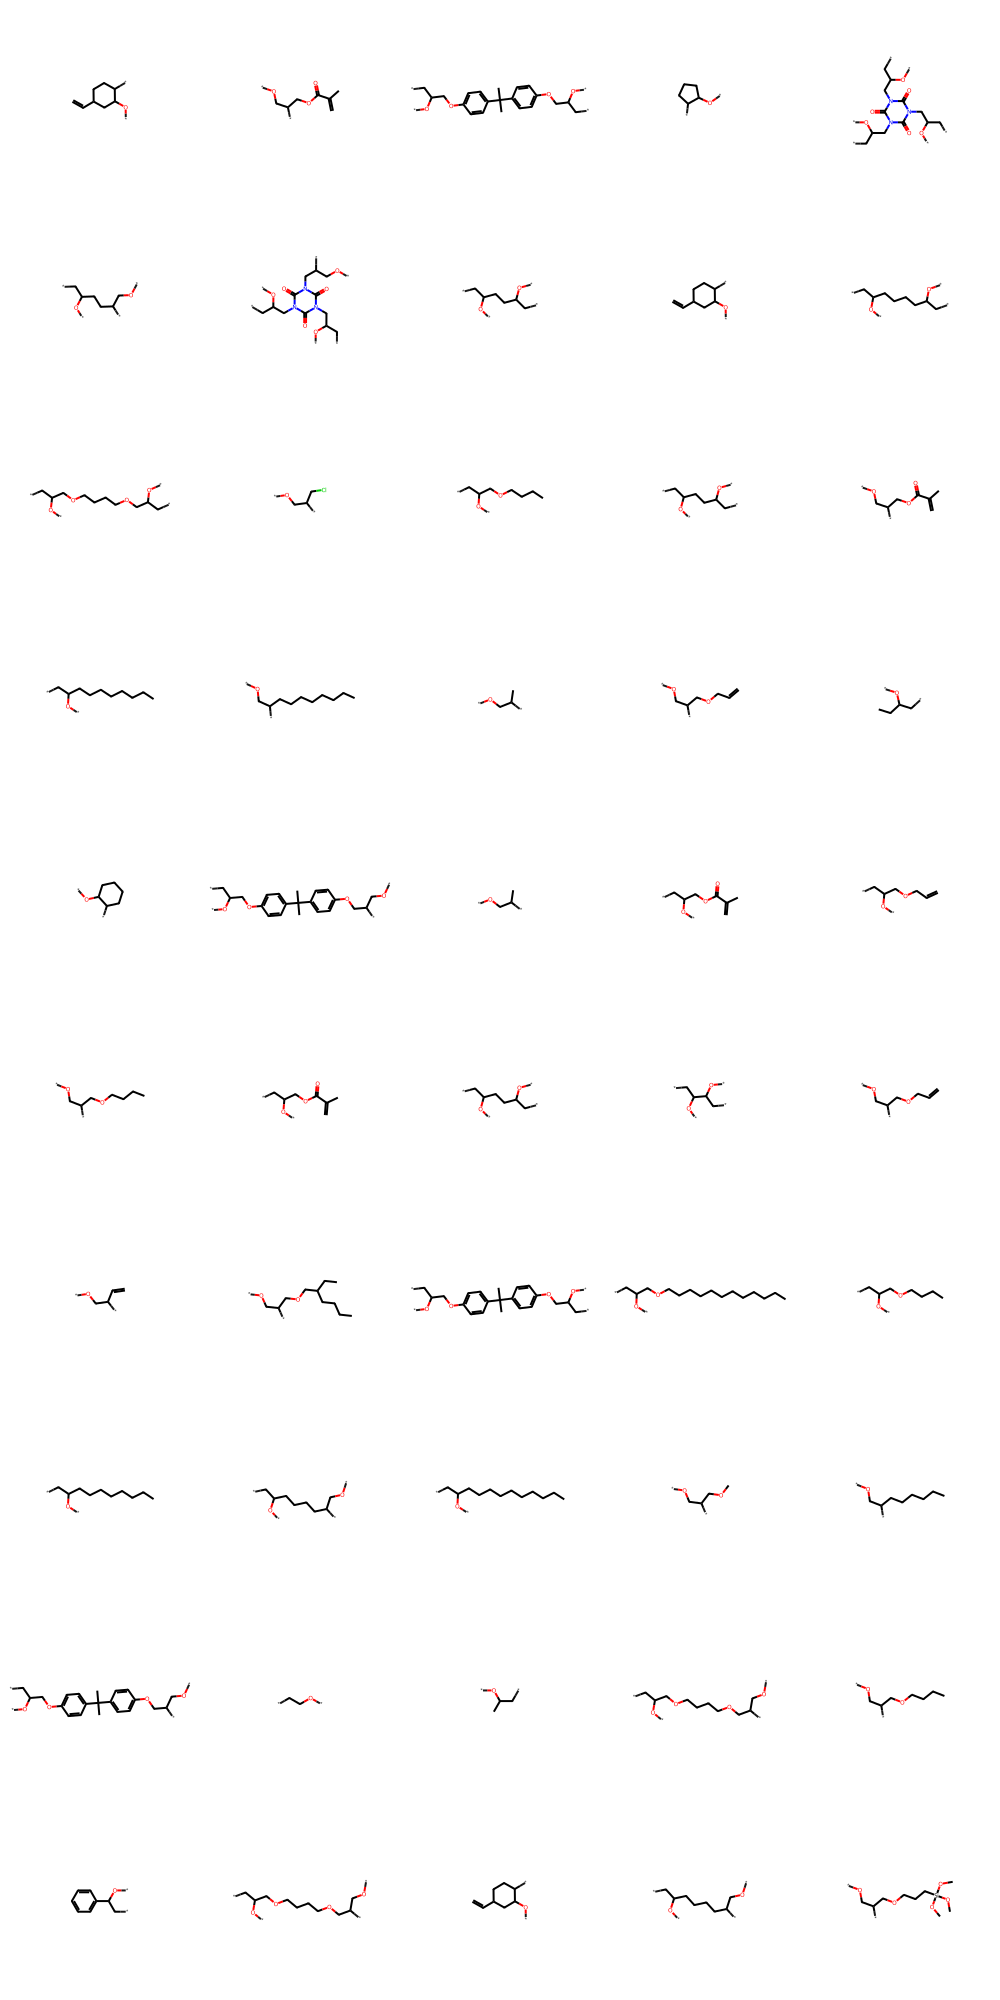

In [17]:
import random
from rdkit import Chem
from rdkit.Chem import Draw

polyeth_1 = [random.randint(0, 50) for i in range(len(DF_run1))]
random_fellas = [Chem.MolFromSmiles(DF_run1.iloc[i, 2]) for i in polyeth_1]
Draw.MolsToGridImage(random_fellas,molsPerRow=5, subImgSize=(200,200))

In [18]:
import pandas as pd

print(DF_run1.dtypes)


mon1             object
mon2             object
polym            object
polymer_class    object
Ps_rxnL          object
reactset         object
dtype: object


In [19]:
import pandas as pd

DF_run1['polym'] = DF_run1['polym'].astype("string")

In [20]:
DF_run1

,mon1,mon2,polym,polymer_class,Ps_rxnL,reactset
0,CC(C)(c1ccc(OCC2CO2)cc1)c1ccc(OCC2CO2)cc1,,*CC(COc1ccc(C(C)(C)c2ccc(OCC(*)CO*)cc2)cc1)O*,polyether,2,"(, CC(C)(c1ccc(OCC2CO2)cc1)c1ccc(OCC2CO2)cc1)"
1,CC(C)(c1ccc(OCC2CO2)cc1)c1ccc(OCC2CO2)cc1,,*CC(COc1ccc(C(C)(C)c2ccc(OCC(C*)O*)cc2)cc1)O*,polyether,2,"(, CC(C)(c1ccc(OCC2CO2)cc1)c1ccc(OCC2CO2)cc1)"
2,C1CO1,,*CCO*,polyether,2,"(, C1CO1)"
3,CC1CO1,,*OCC(*)C,polyether,2,"(, CC1CO1)"
4,CC1CO1,,*CC(C)O*,polyether,2,"(, CC1CO1)"
...,...,...,...,...,...,...
863,O=C(c1ccc(F)cc1)c1ccc(F)cc1,Oc1ccc(-c2ccc(O)c(Br)c2)cc1Br,*Oc1ccc(-c2ccc(Oc3ccc(C(=O)c4ccc(*)cc4)cc3)c(B...,polyether,115,"(O=C(c1ccc(F)cc1)c1ccc(F)cc1, Oc1ccc(-c2ccc(O)..."
864,O=C(c1ccc(F)cc1)c1ccc(F)cc1,Oc1ccc(C2(c3ccc(O)c(C4CCCCC4)c3)CCCCC2)cc1C1CC...,*Oc1ccc(C2(c3ccc(Oc4ccc(C(=O)c5ccc(*)cc5)cc4)c...,polyether,115,(Oc1ccc(C2(c3ccc(O)c(C4CCCCC4)c3)CCCCC2)cc1C1C...
865,O=C(c1ccc(F)cc1)c1ccc(F)cc1,Oc1ccc(C2(c3ccc(O)c(O)c3)c3ccccc3-c3ccccc32)cc1O,*Oc1ccc(C2(c3ccc(Oc4ccc(C(=O)c5ccc(*)cc5)cc4)c...,polyether,115,(Oc1ccc(C2(c3ccc(O)c(O)c3)c3ccccc3-c3ccccc32)c...
866,O=C(c1ccc(F)cc1)c1ccc(F)cc1,Oc1ccc(C2(c3ccc(O)c(O)c3)c3ccccc3-c3ccccc32)cc1O,*Oc1ccc(C2(c3ccc(O*)c(Oc4ccc(C(=O)c5ccc(*)cc5)...,polyether,115,(Oc1ccc(C2(c3ccc(O)c(O)c3)c3ccccc3-c3ccccc32)c...


In [21]:
print (DF_run1.dtypes)

mon1                     object
mon2                     object
polym            string[python]
polymer_class            object
Ps_rxnL                  object
reactset                 object
dtype: object


/home/ejfisher/miniconda3/envs/evan_env/lib/python3.12/site-packages/rdkit/Chem/Draw/IPythonConsole.py:343: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


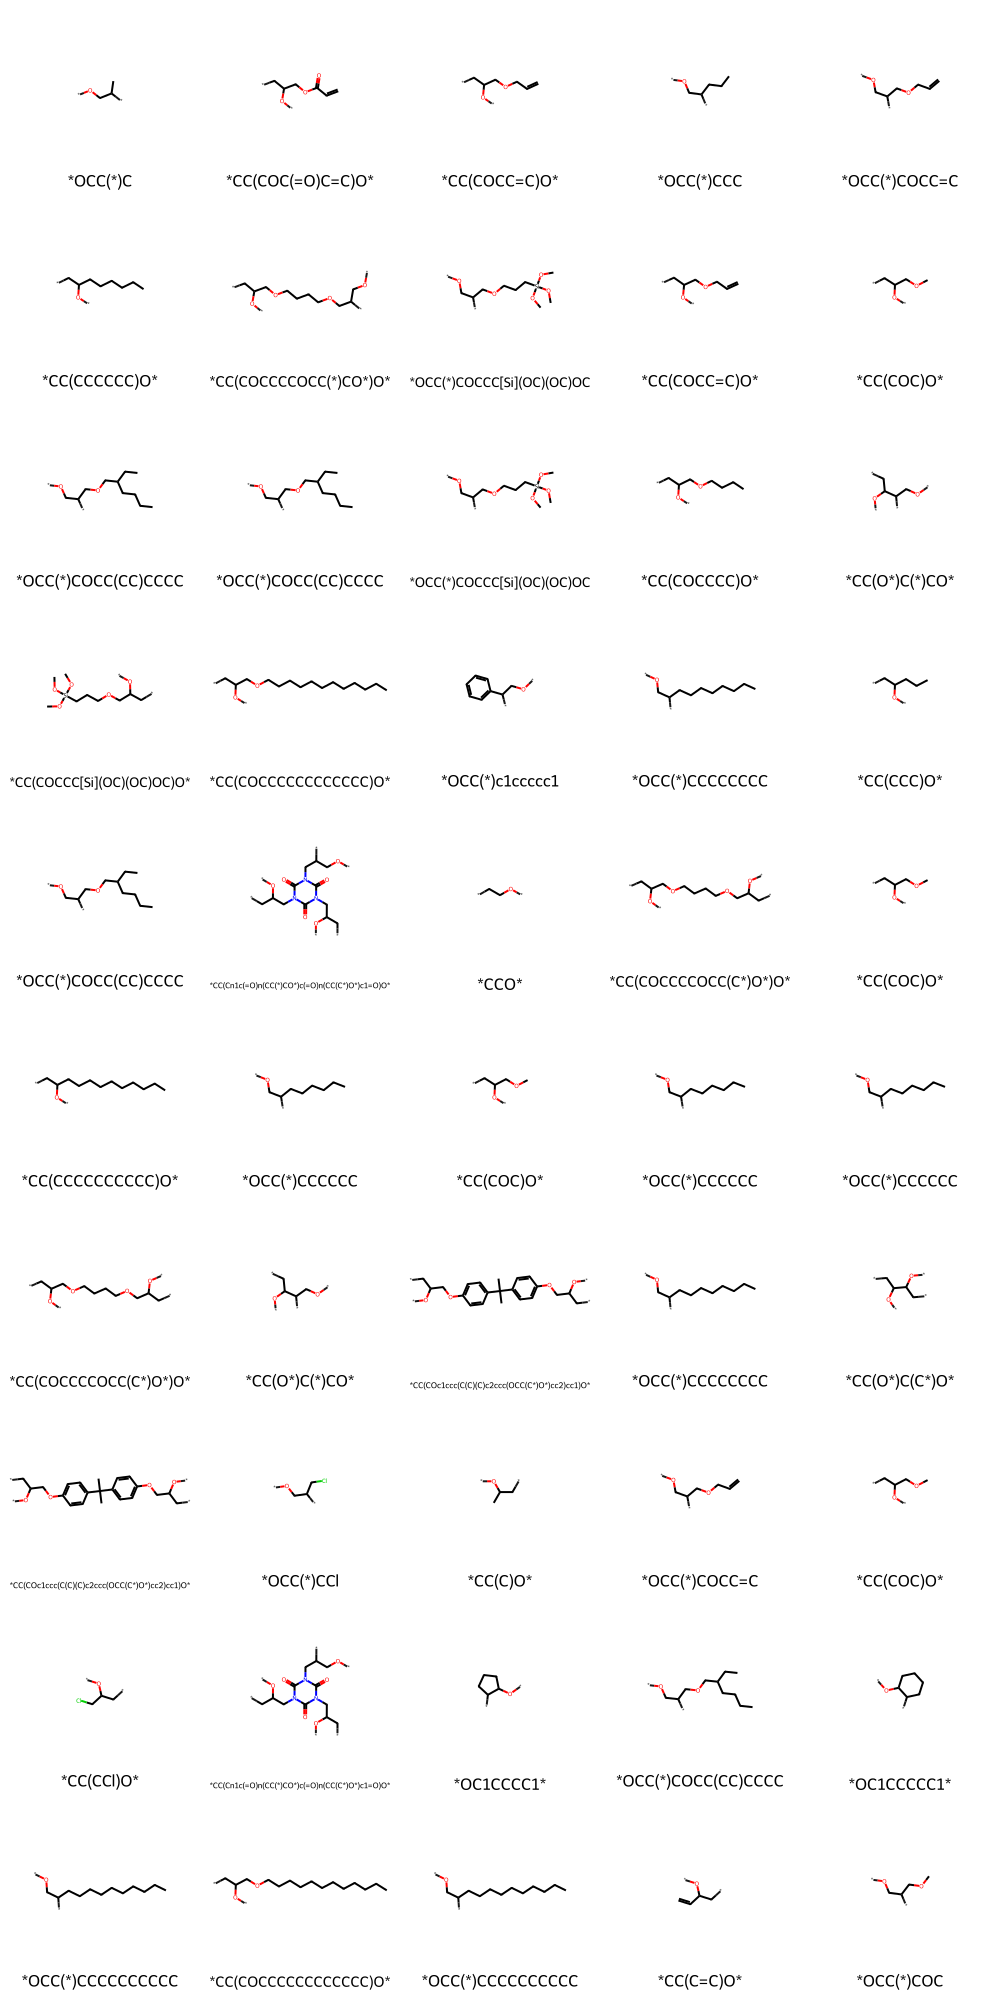

In [22]:
import random
from rdkit import Chem
from rdkit.Chem import Draw

polyeth_1 = [random.randint(0, 50) for i in range(len(DF_run1))]
random_fellas = [Chem.MolFromSmiles(DF_run1.iloc[i, 2]) for i in polyeth_1]
Draw.MolsToGridImage(random_fellas,molsPerRow=5, subImgSize=(200,200))

# Get molecules and SMILES strings from the same rows
random_fellas = [Chem.MolFromSmiles(DF_run1.iloc[i, 2]) for i in polyeth_1]
smiles_legends = [DF_run1.iloc[i, 2] for i in polyeth_1]

# Draw with SMILES as legends
Draw.MolsToGridImage(random_fellas, molsPerRow=5, subImgSize=(200,200), legends=smiles_legends)

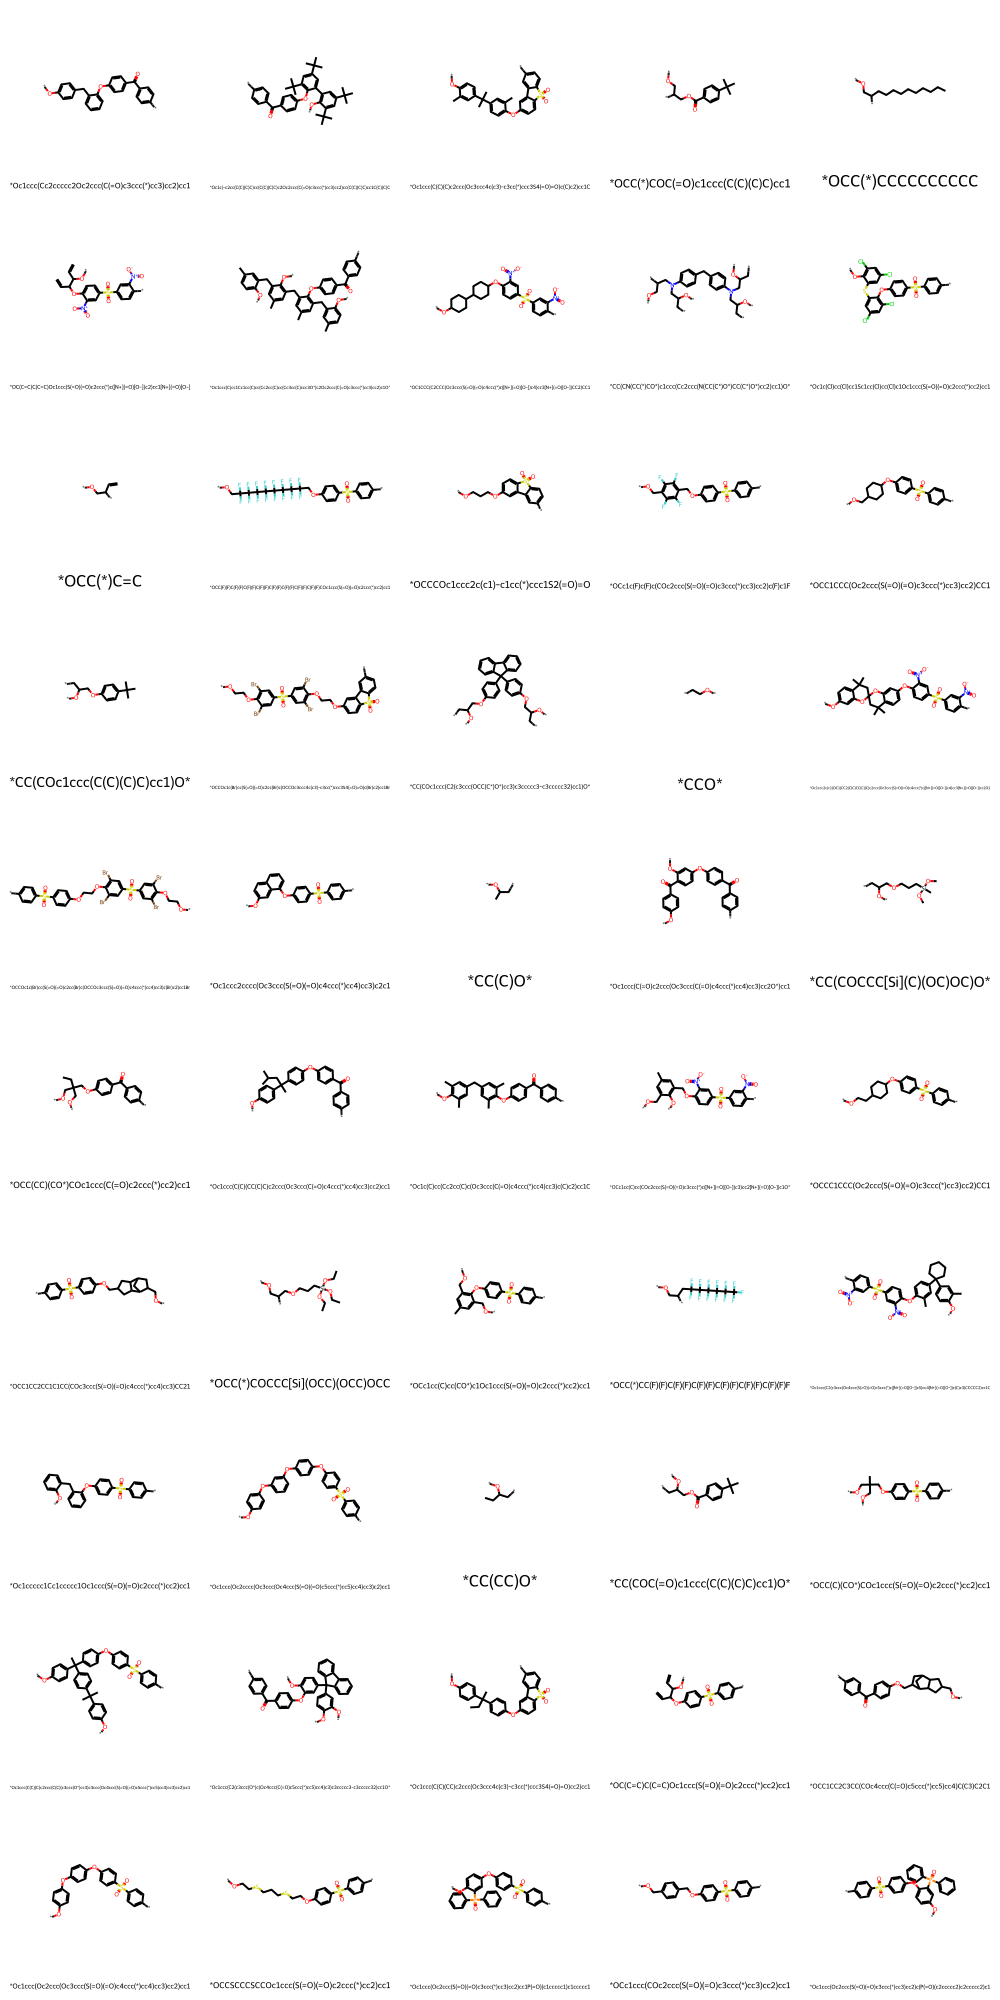

In [23]:
import random
from rdkit import Chem
from rdkit.Chem import Draw

# Ensure you don't sample more than the number of rows in the DataFrame
num_samples = 50
num_rows = len(DF_run1)
if num_samples > num_rows:
    raise ValueError("num_samples cannot be greater than the number of rows in the DataFrame.")

# Get 50 unique random indices
polyeth_1 = random.sample(range(num_rows), num_samples)

# Get molecules and SMILES strings from the same rows
random_fellas = [Chem.MolFromSmiles(DF_run1.iloc[i, 2]) for i in polyeth_1]
smiles_legends = [DF_run1.iloc[i, 2] for i in polyeth_1]

# Draw with SMILES as legends
Draw.MolsToGridImage(random_fellas, molsPerRow=5, subImgSize=(200,200), legends=smiles_legends)


Please enter the number of samples to a max of 50:  5


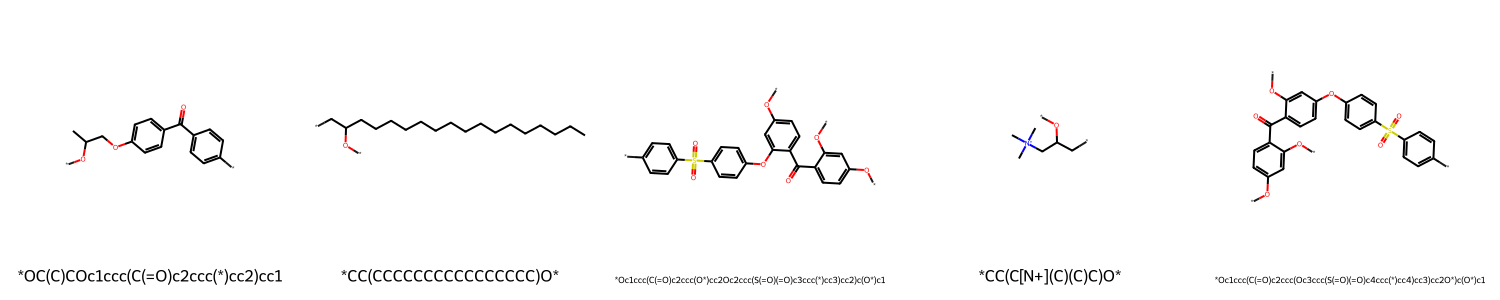

In [24]:
import random
from rdkit import Chem
from rdkit.Chem import Draw

# Prompt user for the number of samples and convert to int
num_samples = int(input('Please enter the number of samples to a max of 50: '))
num_rows = len(DF_run1)
if num_samples > num_rows:
    raise ValueError("num_samples cannot be greater than the number of rows in the DataFrame.")

# Get unique random indices
polyeth_1 = random.sample(range(num_rows), num_samples)

# Get molecules and SMILES strings from the same rows
random_fellas = [Chem.MolFromSmiles(DF_run1.iloc[i, 2]) for i in polyeth_1]
smiles_legends = [DF_run1.iloc[i, 2] for i in polyeth_1]

# Draw with SMILES as legends
Draw.MolsToGridImage(random_fellas, molsPerRow=5, subImgSize=(300,300), legends=smiles_legends)


352


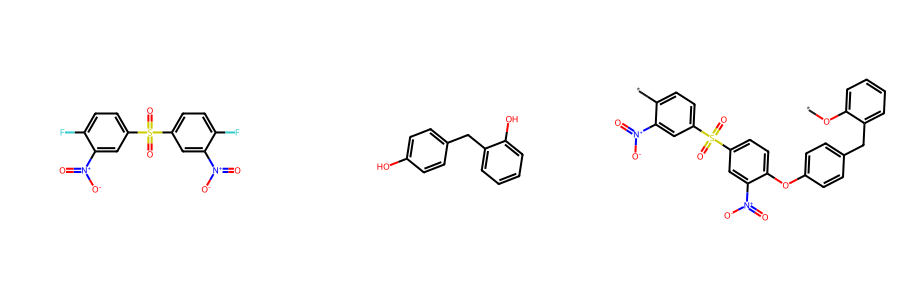

In [25]:
#Draw example of generated polymerization reaction
pickupNo = int(random.randint(0,len(DF_run1)))
print(pickupNo)
m1=Chem.MolFromSmiles(DF_run1.iloc[pickupNo,0])
m2=Chem.MolFromSmiles(DF_run1.iloc[pickupNo,1])
p=Chem.MolFromSmiles(DF_run1.iloc[pickupNo,2])
if DF_run1.iloc[pickupNo,1] != '':
    L = [m1, m2, p]
else:
    m2 = Chem.MolFromSmiles('') #None
    L = [m1, m2, p]
Draw.MolsToGridImage(L,molsPerRow=3, subImgSize=(300,300))

157


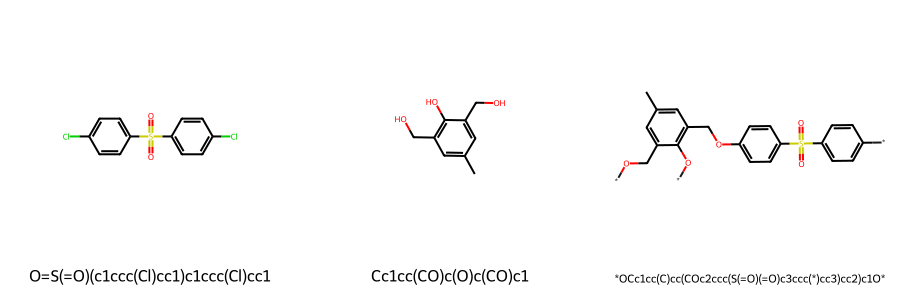

In [26]:
import random
from rdkit import Chem
from rdkit.Chem import Draw

# Pick a random row
pickupNo = random.randint(0, len(DF_run1) - 1)
print(pickupNo)

# Get molecules from SMILES
m1 = Chem.MolFromSmiles(DF_run1.iloc[pickupNo, 0])
m2 = Chem.MolFromSmiles(DF_run1.iloc[pickupNo, 1])
p = Chem.MolFromSmiles(DF_run1.iloc[pickupNo, 2])

# Prepare molecule list and corresponding SMILES legends
if DF_run1.iloc[pickupNo, 1] != '':
    L = [m1, m2, p]
    legends = [
        Chem.MolToSmiles(m1) if m1 else '',
        Chem.MolToSmiles(m2) if m2 else '',
        Chem.MolToSmiles(p) if p else ''
    ]
else:
    m2 = None  # More idiomatic than Chem.MolFromSmiles('')
    L = [m1, m2, p]
    legends = [
        Chem.MolToSmiles(m1) if m1 else '',
        '',
        Chem.MolToSmiles(p) if p else ''
    ]

# Draw with SMILES as legends
Draw.MolsToGridImage(L, molsPerRow=3, subImgSize=(300, 300), legends=legends)


Enter the number of reactions to sample:  20


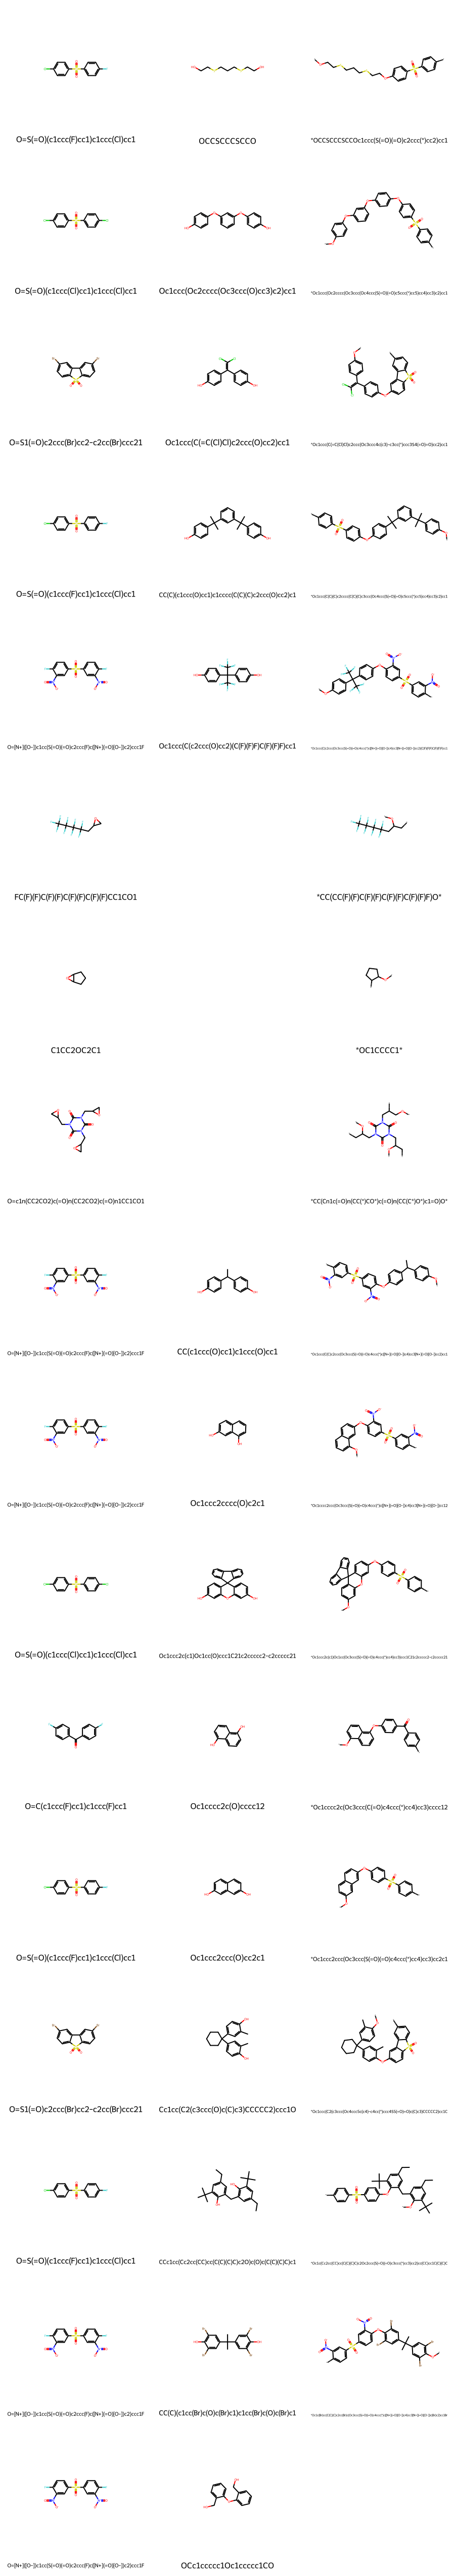

In [27]:
import random
from rdkit import Chem
from rdkit.Chem import Draw

# Prompt user for the number of samples
num_samples = int(input("Enter the number of reactions to sample: "))
num_rows = len(DF_run1)
if num_samples > num_rows:
    raise ValueError("Number of samples cannot exceed number of rows in the DataFrame.")

# Randomly select unique indices
sample_indices = random.sample(range(num_rows), num_samples)

# Prepare all molecules and legends for the grid
all_mols = []
all_legends = []

for idx in sample_indices:
    m1 = Chem.MolFromSmiles(DF_run1.iloc[idx, 0])
    m2 = Chem.MolFromSmiles(DF_run1.iloc[idx, 1])
    p = Chem.MolFromSmiles(DF_run1.iloc[idx, 2])
    
    # Build the molecule list for this reaction
    if DF_run1.iloc[idx, 1] != '':
        L = [m1, m2, p]
        legends = [
            Chem.MolToSmiles(m1) if m1 else '',
            Chem.MolToSmiles(m2) if m2 else '',
            Chem.MolToSmiles(p) if p else ''
        ]
    else:
        m2 = None
        L = [m1, m2, p]
        legends = [
            Chem.MolToSmiles(m1) if m1 else '',
            '',
            Chem.MolToSmiles(p) if p else ''
        ]
    all_mols.extend(L)
    all_legends.extend(legends)

# Draw all reactions in a grid (3 columns per reaction)
Draw.MolsToGridImage(
    all_mols,
    molsPerRow=3,
    subImgSize=(300, 300),
    legends=all_legends
)
